<a href="https://colab.research.google.com/github/HuynhAnhTai0207/MachineLearning_20130388_HuynhAnhTai/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset



**2. Data Exploration**

In [ ]:
#Đọc file
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv') 
df.head(5)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#Lấy thông tin
import pandas as pd
print ("Số lượng mẫu:", df.shape [0])
print ("Số lượng tính năng:", df.shape [1])
print ("Tên của các tính năng đầu vào:", list (df.columns) [:  -1])
print ("Tên của các tính năng đầu ra:", list (df.columns) [- 1])
print ("Số lượng mẫu không phải là:", df.isna (). sum (). sum ())

Số lượng mẫu: 12330
Số lượng tính năng: 18
Tên của các tính năng đầu vào: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
Tên của các tính năng đầu ra: Revenue
Số lượng mẫu không phải là: 0


In [ ]:
#Hiển thị thông tin tổng quan về DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Đếm giá trị duy nhất cho mỗi cột
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
print('Số lượng mẫu trùng lặp: ', df.duplicated().sum())

Số lượng mẫu trùng lặp:  125


In [ ]:
df = df.drop_duplicates()
print("Số lượng mẫu:", df.shape[0])
print("Số lượng tính năng:", df.shape[1])

Số lượng mẫu: 12205
Số lượng tính năng: 18


In [ ]:
print(df['Month'].value_counts())
print(df['VisitorType'].value_counts())

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64


In [ ]:
#Tính toán thống kê mô tả của các giá trị số trong các cột
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


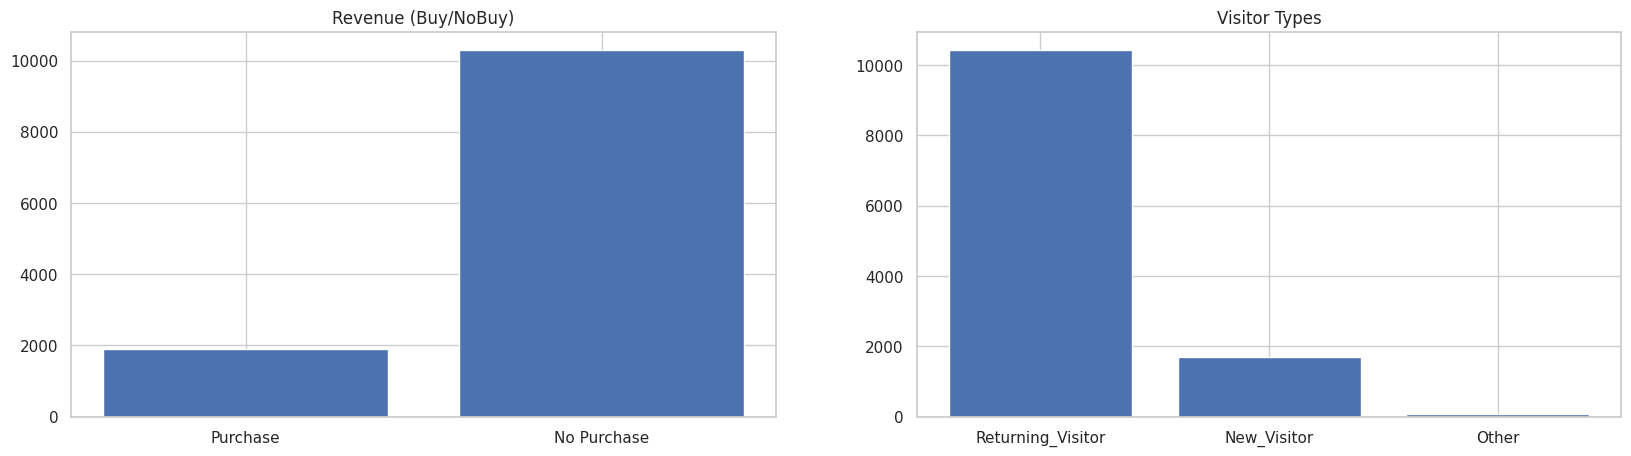



Percent share for VisitorType:
Returning_Visitor    85.464973
New_Visitor          13.871364
Other                 0.663662
Name: VisitorType, dtype: float64


Percent share for Revenue:
False    84.367063
True     15.632937
Name: Revenue, dtype: float64


In [ ]:
#thông tin về tỷ lệ phần trăm của hai tính năng trong tập dữ liệu
import matplotlib.pyplot as plt
#tạo một hình ảnh (figure) với hai trục con (subplots)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 5)

# Biểu đồ số lượng mua/nhận không mua
axs[0].set_title("Revenue (Buy/NoBuy)")
TF = ["Purchase", "No Purchase"]
TF_count = [df['Revenue'].value_counts()[True], df['Revenue'].value_counts()[False]]
axs[0].bar(TF, TF_count)

# Biểu đồ loại khách thăm quan
axs[1].set_title("Visitor Types")
Vtype = ['Returning_Visitor', 'New_Visitor', 'Other']
count_vtype = [df['VisitorType'].value_counts()['Returning_Visitor'],
               df['VisitorType'].value_counts()['New_Visitor'],
               df['VisitorType'].value_counts()['Other']]
axs[1].bar(Vtype, count_vtype)

plt.show()

# Phần trăm giá trị đếm cho tính năng Loại khách thăm quan
print("\n")
print("Percent share for VisitorType:")
print(df['VisitorType'].value_counts(normalize=True)*100)

# Phần trăm giá trị đếm cho tính năng Doanh thu
print("\n")
print("Percent share for Revenue:")
print(df['Revenue'].value_counts(normalize=True)*100)


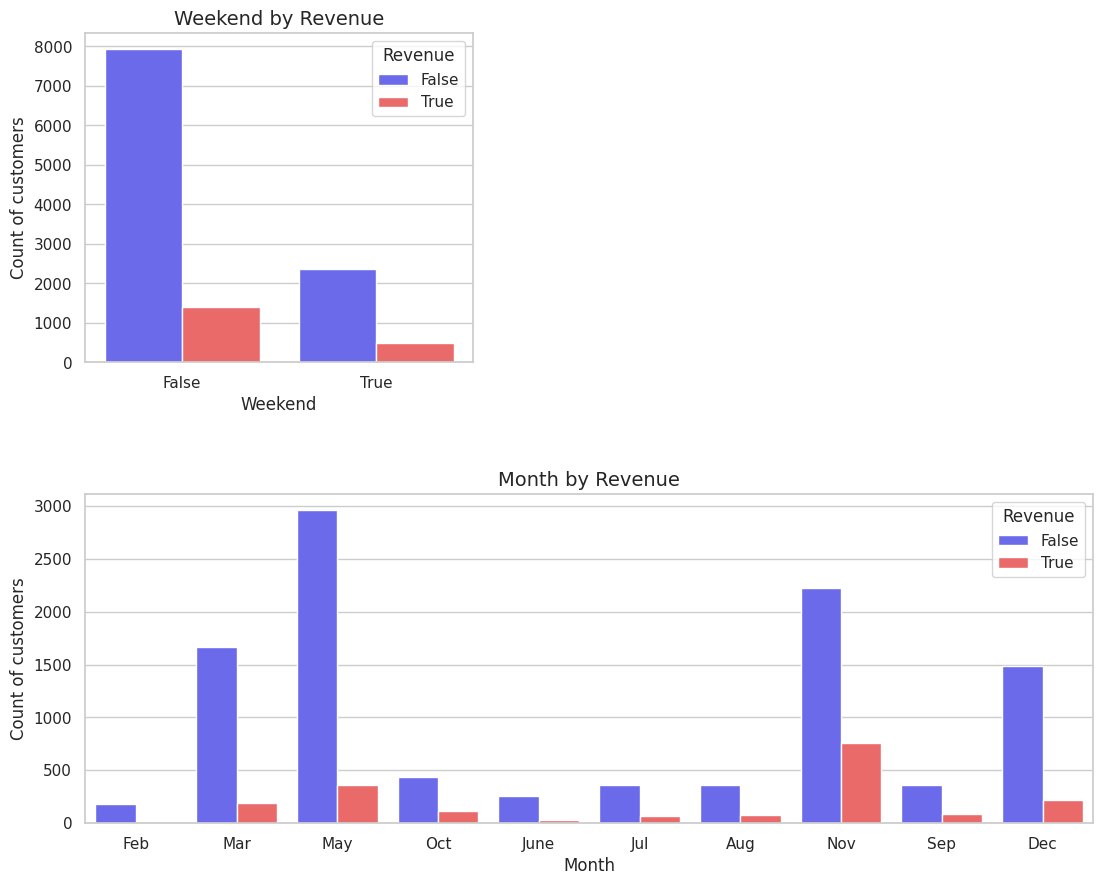

In [ ]:
#đếm số lượng khách truy cập theo "Weekend" và "Month"
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13,10))

ax = plt.subplot(221)
ax = sns.countplot(x="Weekend", data=df,
palette="seismic", hue="Revenue")
ax.set_xlabel("Weekend", fontsize=12)
ax.set_ylabel("Count of customers", fontsize=12)
ax.set_title("Weekend by Revenue", fontsize=14)

ax2 = plt.subplot(212)
ax2 = sns.countplot(x="Month", data=df,
palette="seismic", hue="Revenue")
ax2.set_xlabel("Month", fontsize=12)
ax2.set_ylabel("Count of customers", fontsize=12)
ax2.set_title("Month by Revenue", fontsize=14)

plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)
plt.show()

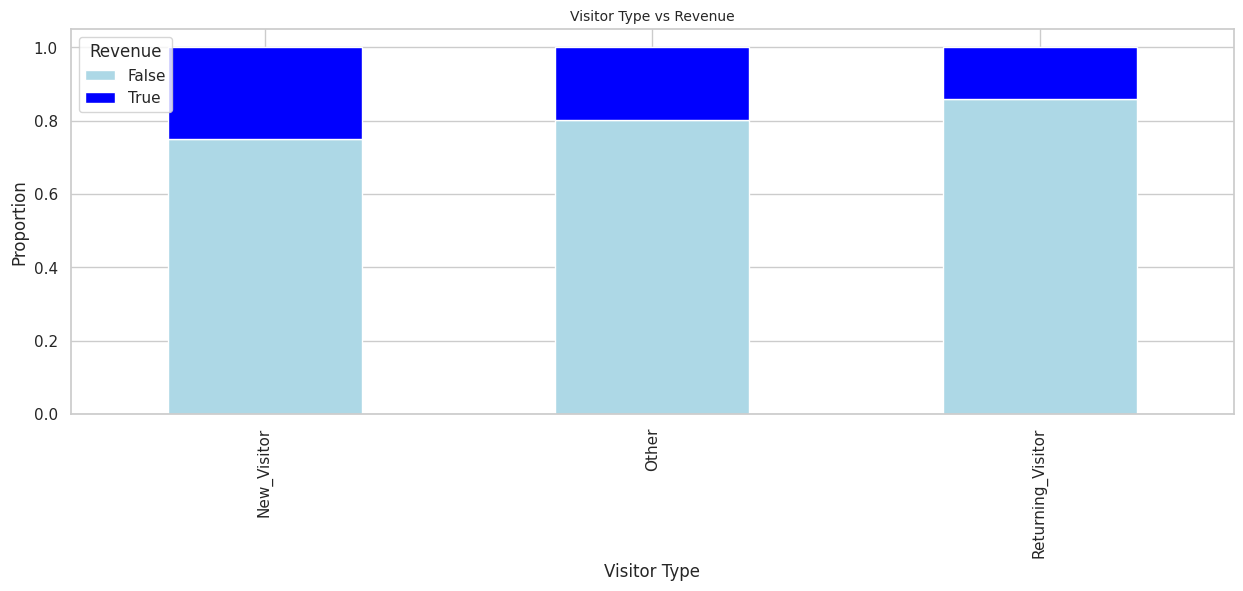

In [ ]:
#biểu diễn tỷ lệ khách thăm quan mua và không mua sản phẩm theo loại khách thăm quan
import pandas as pd
import matplotlib.pyplot as plt

df_a = pd.crosstab(df['VisitorType'], df['Revenue'])
df_a.div(df_a.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 5), color=['lightblue', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize=10)
plt.xlabel('Visitor Type')
plt.ylabel('Proportion')
plt.show()

In [ ]:
# Sao chép df để xây dựng mô hình phân loại
df2 = df.copy()
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#chuẩn bị dữ liệu cho mô hình phân loại 
from sklearn.preprocessing import LabelEncoder
# Loại trừ biến mục tiêu
df2['Browser'] = df2['Browser'].astype(int)
df2['Region'] = df2['Region'].astype(int)
df2['TrafficType'] = df2['TrafficType'].astype(int)
df2['Weekend'] = df2['Weekend'].astype(str)
# Thay thế tính năng kiểu đối tượng thành số tương ứng trong dữ liệu
df2['Month'] = df2['Month'].replace(['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10])
df2['Weekend'] = df2['Weekend'].replace(['True','False'],[1,0])
data=df2.drop(['Revenue'],axis=1)
encoder=LabelEncoder()
data['VisitorType']=encoder.fit_transform(data['VisitorType'])
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,2,1


In [77]:
X = data
y = df2['Revenue'].tolist()
print(len(X), len(y))

12205 12205


In [78]:
from sklearn.model_selection import train_test_split

# Chia train/test theo tỷ lệ 70:30.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, random_state = 42)

In [79]:
name_scores = ['Accuracy', 'Precision','Recall','F1_weighted']
score_dt = []
score_nn = []
score_svm = []
score_rf = []

**3. Neural network**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Độ chính xác - Accuracy:  0.8959584926269798
Độ đo F1 - f1score:  0.6231454005934718
Độ chính xác - precision:  0.7175398633257403
Độ phủ - recall:  0.5506993006993007


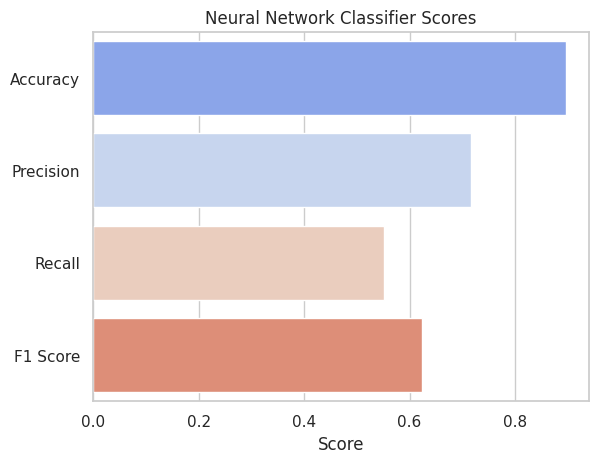

In [80]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Khai báo pipeline gồm hai bước: chuẩn hóa dữ liệu và huấn luyện mô hình Neural Network
pipe_nn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier(random_state=42, hidden_layer_sizes=(25,))),
])

# Huấn luyện mô hình trên tập huấn luyện
pipe_nn.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = pipe_nn.predict(X_test)

# Tính toán các độ đo đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accuracy)
print("Độ đo F1 - f1score: ", f1score)
print("Độ chính xác - precision: ", precision)
print("Độ phủ - recall: ", recall)

# Lưu các giá trị độ đo vào biến score_nn để vẽ biểu đồ
score_nn = []
score_nn.append(round(accuracy, 4))
score_nn.append(round(precision, 4))
score_nn.append(round(recall, 4))
score_nn.append(round(f1score, 4))

#vẽ biểu đồ
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sns.set(style='whitegrid')
ax = sns.barplot(x=score_nn, y=labels, palette='coolwarm')
ax.set_title('Neural Network Classifier Scores')
ax.set_xlabel('Score')
plt.show()


**4. SVM**

Độ chính xác - Accuracy:  0.883397050791917
Độ đo F1 - f1score:  0.4824242424242425
Độ chính xác - precision:  0.7865612648221344
Độ phủ - recall:  0.3479020979020979


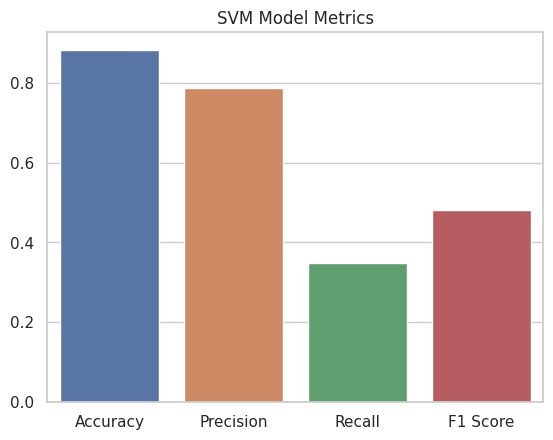

In [81]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tọa mô hình SVM
pipe_lr = Pipeline([
                    ('scaler', MinMaxScaler()),
                    ('clf', svm.SVC(kernel='linear'))
                  ])

pipe_lr.fit(X_train, y_train)

# Dựa đoán và tính toán các  độ đo trên tập test
y_pred = pipe_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Độ chính xác - Accuracy: ", accuracy)
print("Độ đo F1 - f1score: ", f1score)
print("Độ chính xác - precision: ", precision)
print("Độ phủ - recall: ", recall)
# Lưu spps liệu để vẽ biểu đồ
score_svm.append(round(accuracy,4))
score_svm.append(round(precision,4))
score_svm.append(round(recall,4))
score_svm.append(round(f1score,4))

df = pd.DataFrame({
    'Accuracy': [score_svm[0]],
    'Precision': [score_svm[1]],
    'Recall': [score_svm[2]],
    'F1 Score': [score_svm[3]]
})

# Vẽ biểu đồ cột
sns.barplot(data=df)
plt.title('SVM Model Metrics')
plt.show()


**5. kNN**

Độ chính xác - Accuracy:  0.8541780447842708
Độ đo F1 - f1score:  0.327455919395466
Độ chính xác - precision:  0.5855855855855856
Độ phủ - recall:  0.22727272727272727


<ipython-input-83-91d5026ac153>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)


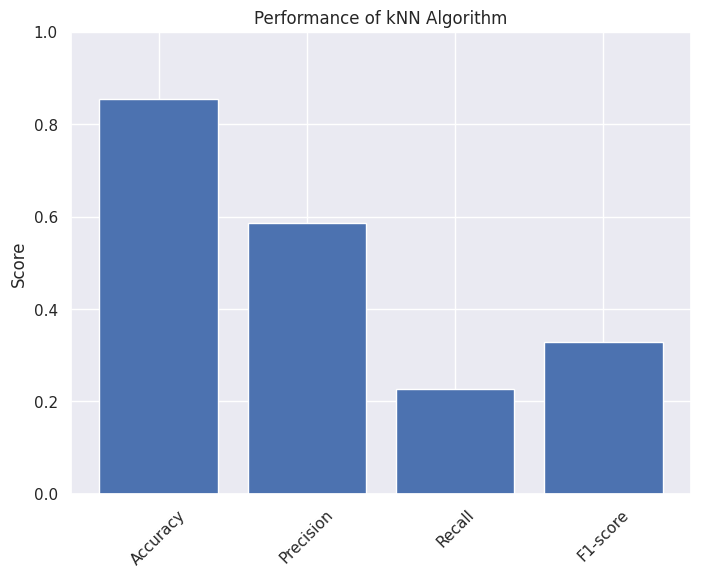

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình kNN
pipe_knn = Pipeline([
                     ('scaler', MinMaxScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=5))
                    ])

pipe_knn.fit(X_train, y_train)

# Dự đoán và tính toán các độ đo trên tập test
y_pred = pipe_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Độ chính xác - Accuracy: ", accuracy)
print("Độ đo F1 - f1score: ", f1score)
print("Độ chính xác - precision: ", precision)
print("Độ phủ - recall: ", recall)

# Lưu kết quả để vẽ biểu đồ
score_knn = []
score_knn.append(round(accuracy,4))
score_knn.append(round(precision,4))
score_knn.append(round(recall,4))
score_knn.append(round(f1score,4))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')

ax.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], score_knn)
ax.set_title('Performance of kNN Algorithm')
ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score'], rotation=45)

plt.show()


**6.Naive Bayes**

Độ chính xác - Accuracy:  0.8511742217367558
Độ đo F1 - f1score:  0.5305770887166237
Độ chính xác - precision:  0.5229202037351444
Độ phủ - recall:  0.5384615384615384


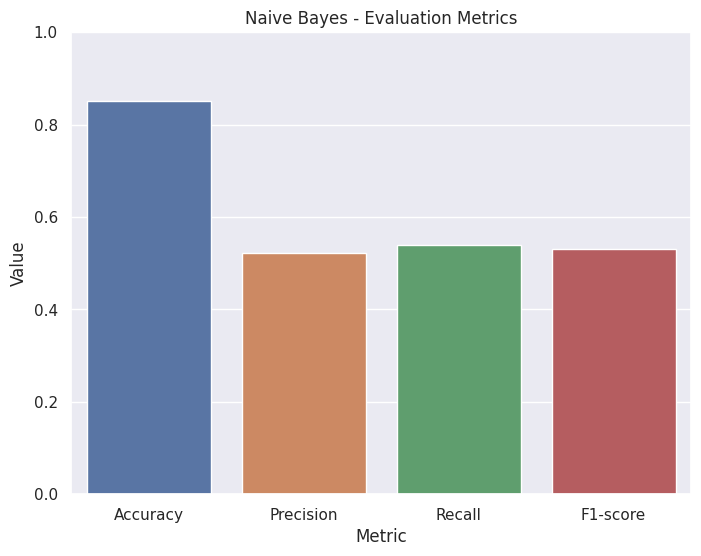

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình Naive Bayes
gnb = GaussianNB()

# Huấn luyện mô hình trên tập train
gnb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = gnb.predict(X_test)

# Tính các độ đo đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# In kết quả các độ đo đánh giá mô hình
print("Độ chính xác - Accuracy: ", accuracy)
print("Độ đo F1 - f1score: ", f1score)
print("Độ chính xác - precision: ", precision)
print("Độ phủ - recall: ", recall)

# Vẽ biểu đồ thể hiện độ đo đánh giá mô hình
score_nb = []
score_nb.append(round(accuracy,4))
score_nb.append(round(precision,4))
score_nb.append(round(recall,4))
score_nb.append(round(f1score,4))

score_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
score_df = pd.DataFrame({'Metric': score_names, 'Value': score_nb})
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=score_df)
plt.title('Naive Bayes - Evaluation Metrics')
plt.ylim(0, 1)
plt.show()


**7. Random Forest**

Độ chính xác - Accuracy:  0.9038776624795194
Độ đo F1 - f1score:  0.6458752515090543
Độ chính xác - precision:  0.7606635071090048
Độ phủ - recall:  0.5611888111888111


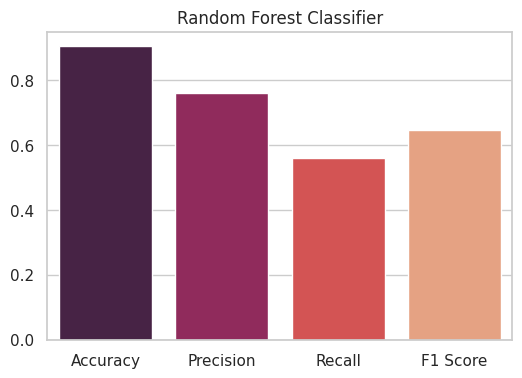

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
#khởi tạo mô hình Random Forest
pipe_rf = Pipeline([
('scaler', MinMaxScaler()),
('clf', RandomForestClassifier(max_depth=10, random_state=0))
])

pipe_rf.fit(X_train, y_train)

#dự đoán và tính toán các độ đo trên tập test
y_pred = pipe_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Độ chính xác - Accuracy: ", accuracy)
print("Độ đo F1 - f1score: ", f1score)
print("Độ chính xác - precision: ", precision)
print("Độ phủ - recall: ", recall)

#lưu số liệu để vẽ biểu đồ
score_rf.append(round(accuracy,4))
score_rf.append(round(precision,4))
score_rf.append(round(recall,4))
score_rf.append(round(f1score,4))

#vẽ biểu đồ
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.title('Random Forest Classifier')
sns.barplot(x=labels, y=score_rf, palette='rocket')
plt.show()

**8. Decision Tree**

Độ chính xác - Accuracy:  0.8869470234844348
Độ đo F1 - f1score:  0.5548387096774193
Độ chính xác - precision:  0.7206703910614525
Độ phủ - recall:  0.45104895104895104


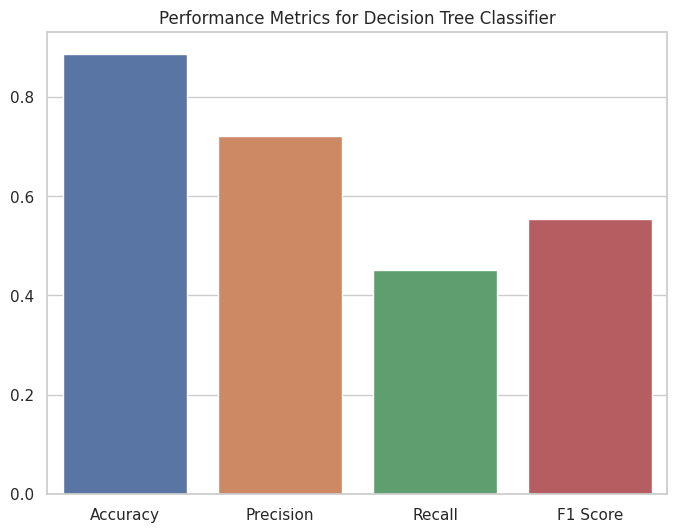

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Áp dụng pipeline trên mô hình cây quyết định
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
                    ('scaler', MinMaxScaler()),
                    ('clf', DecisionTreeClassifier(random_state=42,max_depth=3))
                   ])

pipe_lr.fit(X_train, y_train)

# Dựa đoán và tính toán các  độ đo trên tập test
y_pred = pipe_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Độ chính xác - Accuracy: ", accuracy)
print("Độ đo F1 - f1score: ", f1score)
print("Độ chính xác - precision: ", precision)
print("Độ phủ - recall: ", recall)

# Lưu dữ liệu để vẽ biểu đồ
score_dt.append(round(accuracy,4))
score_dt.append(round(precision,4))
score_dt.append(round(recall,4))
score_dt.append(round(f1score,4))

#vẽ bảng đồ
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=score_dt)
plt.title('Performance Metrics for Decision Tree Classifier')
plt.show()




In [87]:
import pandas as pd

# Tạo DataFrame
df = pd.DataFrame(list(zip(name_scores, score_dt, score_nn, score_svm, score_rf, score_knn, score_nb)),
                  columns=["Scores","Neural Network", "SVM","kNN", "Naive Bayes","Random Forrest", "Decision Tree"])

# In ra bảng kết quả
print(df)



        Scores  Neural Network     SVM     kNN  Naive Bayes  Random Forrest  \
0     Accuracy          0.8869  0.8960  0.8834       0.9039          0.8542   
1    Precision          0.7207  0.7175  0.7866       0.7607          0.5856   
2       Recall          0.4510  0.5507  0.3479       0.5612          0.2273   
3  F1_weighted          0.5548  0.6231  0.4824       0.6459          0.3275   

   Decision Tree  
0         0.8512  
1         0.5229  
2         0.5385  
3         0.5306  


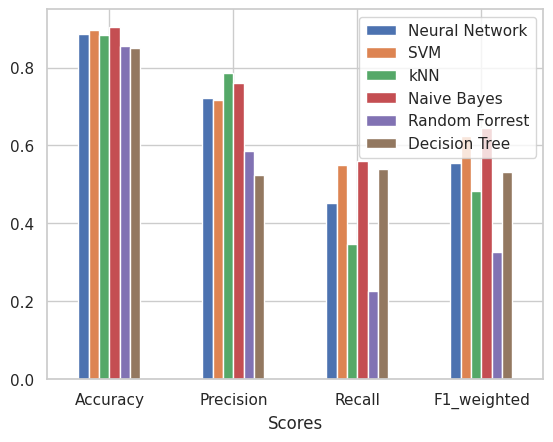

In [88]:
import pandas as pd
ax = df.plot.bar(x='Scores', rot=0)